# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## Globale Entwicklungen der Suizidraten: Ein datenbasierter Vergleich von 2000 bis 2021
### Fragestellung:
- Wie haben sich die altersstandardisierten Suizidraten weltweit sowie in ausgewählten Ländern zwischen 2000 und 2021 entwickelt, und welche sozialen, wirtschaftlichen oder kulturellen Faktoren könnten diese Unterschiede erklären? 
### Datenquelle:
- https://ourworldindata.org/suicide







### 1.4 Daten beschaffen und laden

In [5]:
!pip install pandas seaborn matplotlib

Der Befehl "pip" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [ ]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("death-rate-from-suicides-gho.csv")

# Spalte umbenennen, damit sie einfacher zu verwenden ist
data.rename(columns={'Age-standardized death rate from self-harm among both sexes': 'SuicideRate'}, inplace=True)

# Datenstruktur, Datentypen und fehlende Werte prüfen -> Gibt die ersten 5 Rows aus
data.head()

,Entity,Code,Year,SuicideRate
0,Afghanistan,AFG,2000,7.197108
1,Afghanistan,AFG,2001,7.281792
2,Afghanistan,AFG,2002,7.123594
3,Afghanistan,AFG,2003,7.053904
4,Afghanistan,AFG,2004,7.034545


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
    
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [21]:
data_pivot = data.pivot(index='Entity', columns='Year', values='SuicideRate')
data_pivot.head()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.197108,7.281792,7.123594,7.053904,7.034545,6.910225,6.608689,6.476178,6.302887,5.891947,...,5.774172,5.685669,5.535404,5.319865,5.322144,5.470633,5.424701,5.367804,5.324849,5.320608
Africa,10.093091,10.013195,10.017222,10.010037,9.915320,9.732854,9.715343,9.649155,9.645603,9.606206,...,9.522184,9.436768,9.414608,9.401263,9.310595,9.228361,9.374145,9.355742,9.379318,9.580948
Albania,5.104753,4.418037,4.479788,4.595087,4.502845,6.913495,6.862893,6.947456,6.954976,6.820407,...,4.092385,4.056547,3.798754,3.580979,3.450706,3.292069,3.141507,3.026028,2.507422,2.143994
Algeria,4.140792,3.921089,3.803862,3.521953,3.327965,3.218484,3.081167,2.945067,2.815762,2.683964,...,2.364761,2.327027,2.295923,2.225488,2.135747,2.136896,2.172493,2.170682,1.848795,2.320863
Andorra,9.685721,10.776894,10.718483,9.985846,11.859435,10.398196,10.702955,10.374284,10.033582,9.822695,...,8.119903,9.338711,9.277414,9.163852,9.708513,8.330241,7.659383,8.645201,12.004117,5.742578


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
        4422
    - Wo fehlen Datenpunkte?
        Bei "Code" fehler 132 Datenpunkte - Vermutlich  Einträge wie "World" (Welt) oder Kontinente, die in der Spalte Entity vorhanden sind, aber kein standardisiertes Länderkürzel (Code) besitzen.
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [25]:
data.info()

print(f'\n')

# 1. Anzahl der einzigartigen Klassen (Länder)
unique_countries = data['Entity'].nunique()
print(f"Anzahl einzigartiger Länder (Klassen): {unique_countries}")

# 2. Anzahl der Datenpunkte pro Land (Klasse)
# Zeigt, wie viele Einträge es für Deutschland, Afghanistan, etc. gibt
print("\nAnzahl Datenpunkte pro Land (Top 5):")
print(data['Entity'].value_counts().head())

# 3. Anzahl der einzigartigen Klassen (Jahre)
unique_years = data['Year'].nunique()
print(f"\nAnzahl einzigartiger Jahre (Klassen): {unique_years}")

# 4. Anzahl der Datenpunkte pro Jahr (Klasse)
# Zeigt, wie viele Beobachtungen es pro Jahr gibt
print("\nAnzahl Datenpunkte pro Jahr (Top 5):")
print(data['Year'].value_counts().head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4422 entries, 0 to 4421
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Entity       4422 non-null   object 
 1   Code         4290 non-null   object 
 2   Year         4422 non-null   int64  
 3   SuicideRate  4422 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 138.3+ KB


Anzahl einzigartiger Länder (Klassen): 201

Anzahl Datenpunkte pro Land (Top 5):
Entity
Afghanistan    22
Africa         22
Albania        22
Algeria        22
Andorra        22
Name: count, dtype: int64

Anzahl einzigartiger Jahre (Klassen): 22

Anzahl Datenpunkte pro Jahr (Top 5):
Year
2000    201
2001    201
2002    201
2003    201
2004    201
Name: count, dtype: int64


## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



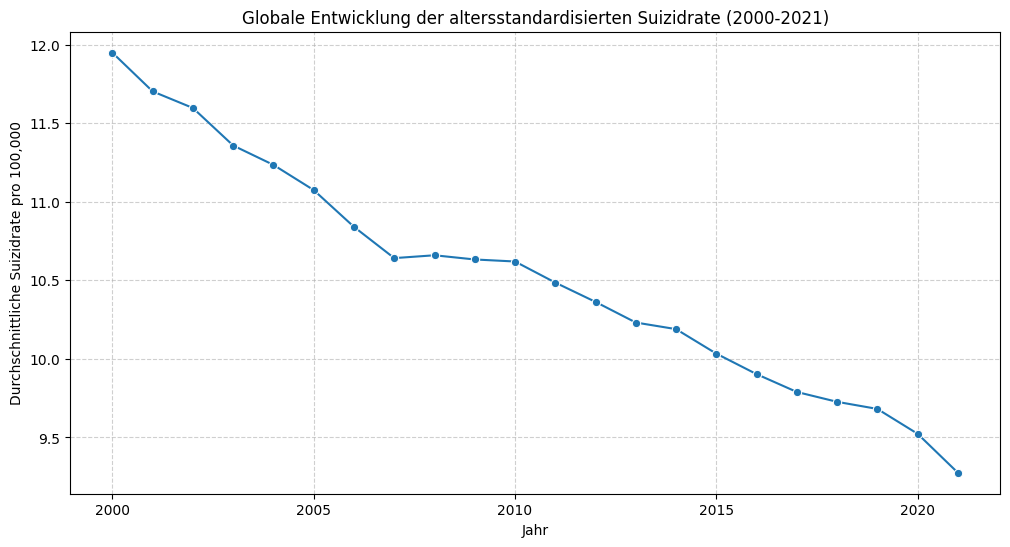

In [26]:
# 1. Durchschnittliche weltweite Suizidrate pro Jahr berechnen
# (Gruppierung nach Jahr und Mittelwertbildung der SuicideRate)
global_trend = data.groupby('Year')['SuicideRate'].mean().reset_index()

# 2. Den globalen Trend als Liniendiagramm visualisieren
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_trend, x='Year', y='SuicideRate', marker='o')

# Achsen und Titel gemäß den Anforderungen beschriften
plt.title('Globale Entwicklung der altersstandardisierten Suizidrate (2000-2021)')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Suizidrate pro 100,000')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

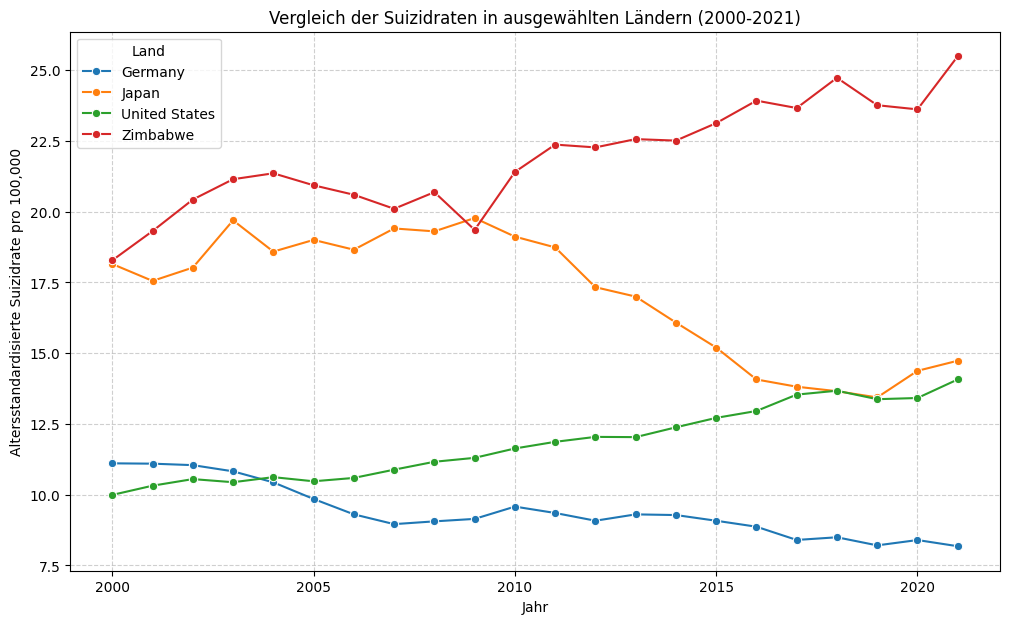

In [27]:
# Ersetze die Platzhalterländer durch deine gewünschten Vergleichsländer
selected_countries = ['Germany', 'United States', 'Japan', 'Zimbabwe']

# Daten filtern, um nur die ausgewählten Länder zu behalten
country_comparison = data[data['Entity'].isin(selected_countries)]

# Visualisierung mit Seaborn lineplot, wobei die Farbe nach Land unterscheidet
plt.figure(figsize=(12, 7))
sns.lineplot(data=country_comparison, x='Year', y='SuicideRate', hue='Entity', marker='o')

# Achsen und Titel beschriften (Wichtig für die volle Punktzahl!)
plt.title('Vergleich der Suizidraten in ausgewählten Ländern (2000-2021)')
plt.xlabel('Jahr')
plt.ylabel('Altersstandardisierte Suizidrate pro 100,000')
plt.legend(title='Land')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()